# Grafy v Pythonu - Matplotlib

### Co matplotlib umí?

* Vytvářet 2D a 3D grafy.
* Umožňuje vytvářet popisky v $\LaTeX$ 
* Kontrolovat nastavení všech grafických prvků v grafu. 
* Kvalitní grafický výstup, včetně formátů PNG, PDF, SVG, EPS.
* GUI pro interaktivní práci s grafy (zoomování, posouvání, ...).

Jedna z vlastností matplotlibu, která si zaslouží zdůraznění a která velice zjednodušuje vytváření vědeckých publikací, je možnost ovládat všechny aspekty a detaily grafu z kódu. Díky tomu můžete ihned zopakovat celý proces vytváření grafu s pozměněnými daty bez nutnosti jít znovu krok po kroku.

Více informací na stránkách projektu: http://matplotlib.org/

In [2]:
# Importujeme základní vykreslovací modul
import matplotlib.pyplot as plt 

# A samozřejmě numpy
import numpy as np

# Občas se hodí i matematika
import math

# Jednoduché grafy

### Objekty a třídy v matplolib

Každému prvku grafu připadá v objektovém rozhraní matplotlibu nějaký objekt:

**Figure** - objekt reprezentující celý obrázek (může obsahovat více různých grafů). Standardně se vytváří voláním `plt.figure()`, což není konstruktor v pravém slova smyslu (funkce vrací nový objekt typu `Figure`, ale dělá toho ještě mnohem více).

**Axes** - objekt reprezentující nějakou soustavu souřadnic (jeden obdélník), do níž lze vykreslovat data. Obvykle se vytváří voláním metody `add_axes` na existujícím objektu `Figure`. Jiné způsoby si popíšeme dále.

**Line2D, ...** - každý typ grafu má vlastní třídu. 

**Text** - objekt reprezentující popisky všeho druhu.

# Rozeberme si nejjednodušší graf


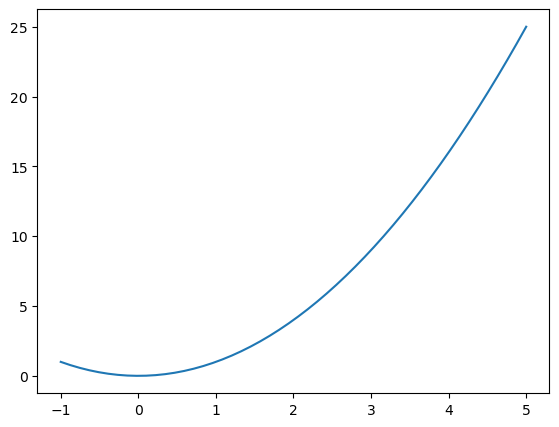

In [5]:
# Vytvoříme jednoduchá data
# (50 bodů rovnoměrně rozmístěných na úseku -1,5)
x = np.linspace(-1, 5, 50)
# jejich druhá mocnina (tj. parabola)
y = x ** 2

# nový objekt Figure = prázdný obrázek
fig = plt.figure()

# U add_axes musíme zadat, jakou část obrázku zabere čtverec se souřadnicemi
# zleva, odspodu, šířka, výška (v relativních hodnotách 0 až 1)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 

# Nyní vykreslíme data
graf_funkce = axes.plot(x, y)
# a zobrazíme obrázek
plt.show()

In [6]:
# podívejme se na jednotlivé objekty
print(fig)
print(axes)
print(graf_funkce)

Figure(640x480)
Axes(0.1,0.1;0.8x0.8)


Takovýto graf by šel samozřejmě vykreslit i jediným příkazem `plt.plot(x, y)`, který vytvoří nový objekt `Figure` a v něm nový objekt `Axes` automaticky.

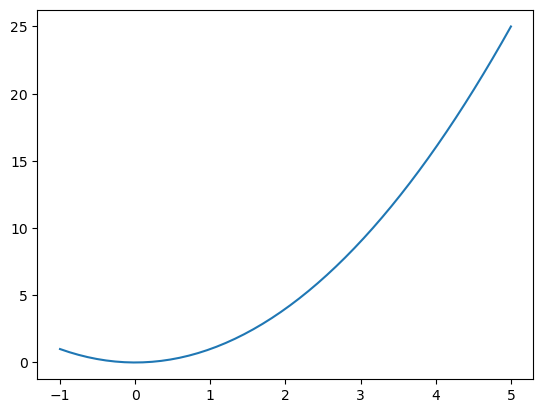

In [7]:
plt.plot(x, y)

Další datovou sadu do jednoho grafu přidáme opětovným zavoláním metody `plot` pro stejný objekt `Axes`:

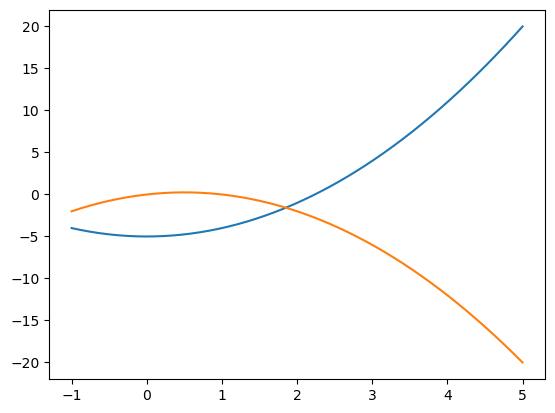

In [8]:
# Kratší získání Figure a Axes
# (pomocí rozdělení obrázku na 1x1 podgraf :-))
fig, axes = plt.subplots()

# Jen voláme vícekrát plot
axes.plot(x, y - 5)
axes.plot(x, x - y)   # druhá datová řada, se automaticky zbarví jinou barvou

Můžeme také vložit několik dvojic datových sad za sebou:

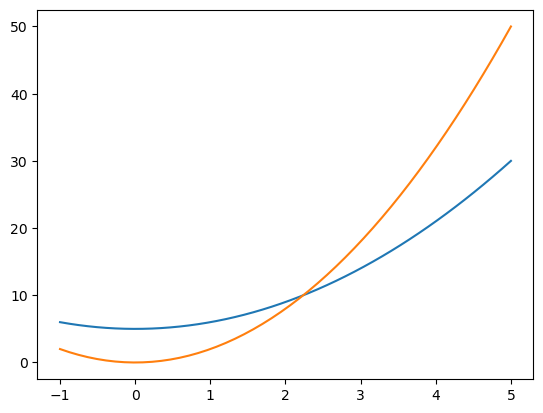

In [9]:
fix, axes = plt.subplots() 

# Dvě datové řady najednou
axes.plot(x, y + 5, x, y * 2)

(50, 2)
(50, 2)


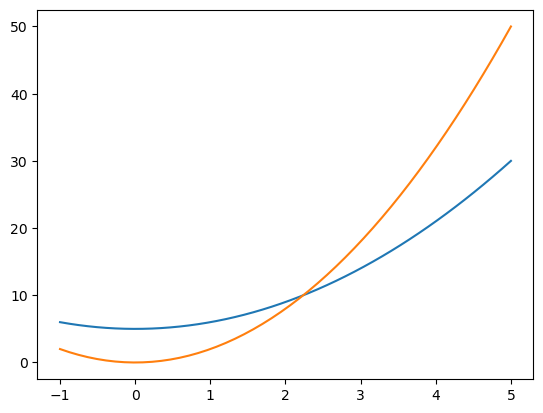

In [10]:
# více grafů najednou lze vykreslit i pomocí sloupcového zápisu
# první argument jsou souřadnice x po sloupcích 
# druhý argument jsou souřadnice y po sloupcích

# uděláme z x sloupcový vektor
x_col = x.reshape((-1,1))
# matici se dvěma sloupci x
xx = np.tile(x_col, (1,2))
print(xx.shape)

# matici se dvěma sloupci hodnot y
yy = np.hstack((x_col ** 2 + 5, 2 * x_col ** 2))
print(yy.shape)

plt.plot(xx,yy)

# Popisky os (základ)

Pro přidání popisků os a nastavování dalších parametrů voláme metody objektu `Axes` (obvykle začínají na `set_`).

Text(0.5, 1.0, 'Druha mocnina')

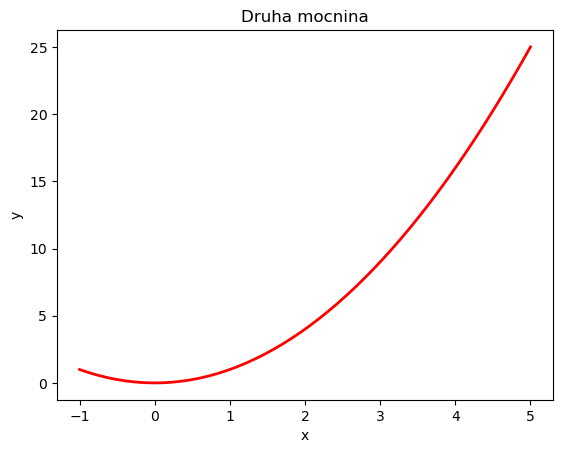

In [11]:
fig, axes = plt.subplots()

axes.plot(x, x ** 2, color='red', linewidth=2)  # Zopakujeme kreslení čárového grafu (+ přidáme styl)
axes.set_xlabel('x')                            # Nastavení popisku osy x
axes.set_ylabel('y')                            # Nastavení popisku osy y
axes.set_title('Druha mocnina')                 # Nastavení popisku celého grafu (soustavy souřadnic)  ;

Všechny popisky jsou typu **Text** a dá se s nimi pomocí metod tohoto objektu všemožně manipulovat.

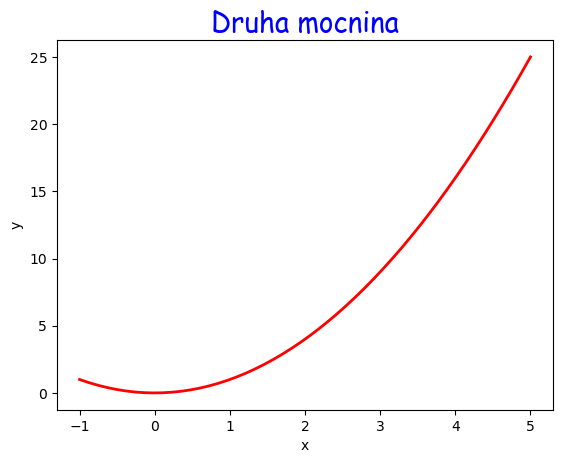

In [12]:
fig, axes = plt.subplots()

axes.plot(x, x ** 2, color='red', linewidth=2)  # Zopakujeme kreslení čárového grafu (+ přidáme styl)
axes.set_xlabel('x')                            # Nastavení popisku osy x
axes.set_ylabel('y')                            # Nastavení popisku osy y
title_text = axes.set_title('Druha mocnina')    # Nastavení popisku celého grafu (soustavy souřadnic)

title_text.set_fontsize(20)                     # Nastavení velikosti písma
title_text.set_color('blue')                    # Nastavení barvy písma
title_text.set_fontname('Comic Sans MS')        # Nastavení fontu písma
# prosím nevyužívejte Comic Sans MS v reálných grafikách :-)

## Ukládání do souboru

K tomuto účelu slouží metoda **savefig**:

In [13]:
# Základní uložení (typ souboru podle jména)
fig.savefig("filename.png")

# Parametry
fig.savefig("filename1.png", dpi=50)

# Vektorová grafika
fig.savefig("filename.svg")
fig.savefig("filename.pdf")

# Další možnosti pro PDF výstup ("profi")
fig.savefig("filename2.pdf", bbox_inches='tight')    #-- Bez bílých okrajů
fig.savefig("filename3.pdf", bbox_inches='tight', transparent=True) #-- Bez bílých okrajů a s průhlednosti

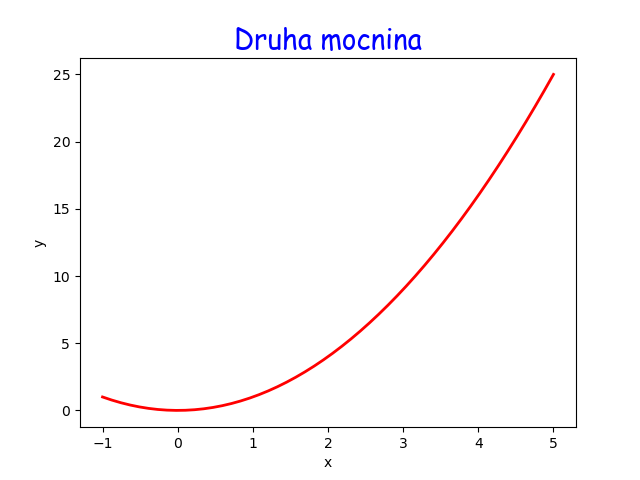

In [14]:
# Jednoduchý způsob, jak v Jupyter Notebooku zobrazit obrázek ze souboru
import IPython.core.display
IPython.core.display.Image(filename="filename.png")

# Více grafů v jednom obrázku

## Přesné umístění

Na vytvoření více grafů v jednom obrázku není nic magického. Prostě jen zavoláme několikrát metodu `add_axes` objektu `Figure`.

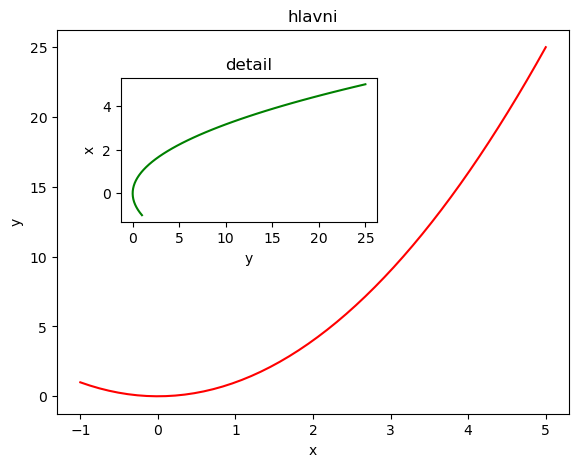

In [15]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # Hlavní
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # Menší, vlevo nahoře

# Hlavní graf
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('hlavni')

# Vnořený graf
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('detail');

### Rozložení navržené matplotlibem

Matplotlib nabízí různé "správce rozložení", které se starají o rozložení více grafů do jednoho obrázku. Nejjednodušší z nich je `subplots`.

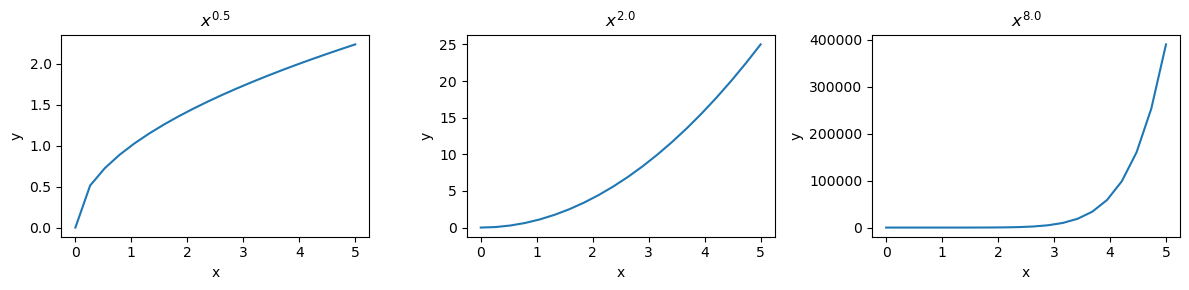

In [16]:
# Vytvoříme 1x3 podgrafy v širokém grafu.
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,3))

# pokud máme k dispozici LaTeX, můžeme jej použít pro hezčí vysázení titulku grafu
# plt.rcParams['text.usetex'] = True

for i, ax in enumerate(axes):
    # V numpy vytvoříme pravidelně rozmístěné hodnoty osy x
    x = np.linspace(0, 5, 20)
    
    # Umocníme na 
    power = (2. ** (2*i - 1))
    
    # Vypočítáme hodnoty y
    y = x ** power
    
    ax.plot(x, y)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    # Použijeme LaTeXovou syntax pro správné vysázení titulku grafu.
    ax.set_title(f"$x^{{{power}}}$")
    
# Opravíme rozložení, aby nám grafy nelezly přes sebe.
fig.tight_layout()

### Komplikovanější rozložení

Pro vytvoření ještě komplikovanějších rozložení slouží metody `gridspec` a `subplot2grid`, viz http://matplotlib.org/users/gridspec.html.

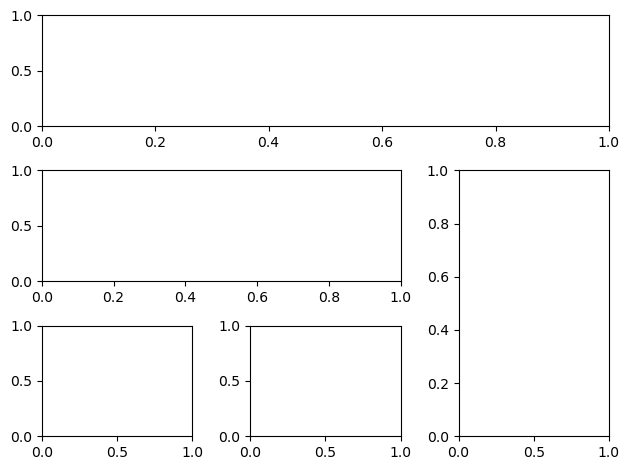

In [17]:
# Inspirující (a zároveň odstrašující) ukázka
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

# Dvě různé osy v jednom grafu

Pokud chceme v jednom grafu mít pro dvě různé datové sady dvě různé osy *x* nebo dvě různé osy *y*, můžeme použít metody `twinx` a `twiny` třídy `Axes`, které vytvoří novou soustavu souřadnic se sdílenou osou *x*, potažmo *y*.

Text(0, 0.5, 'volume $(m^3)$')

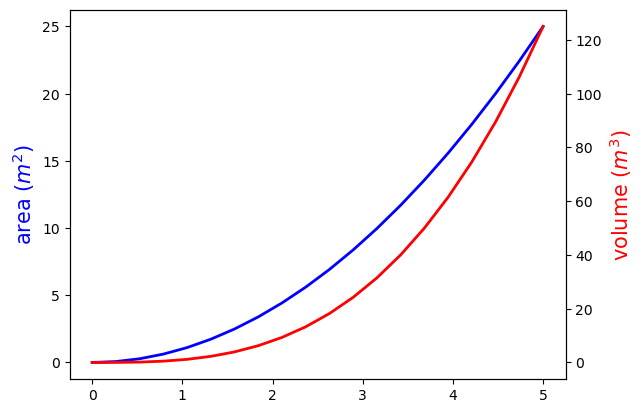

In [18]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, linewidth=2, color="blue")
ax1.set_ylabel("area $(m^2)$", fontsize=15, color="blue")
    
ax2 = ax1.twinx() # Kopie soustavy souřadnic, sdílející osu x
ax2.plot(x, x**3, linewidth=2, color="red")
ax2.set_ylabel("volume $(m^3)$", fontsize=15, color="red")

Text(0.5, 0, 'linear')

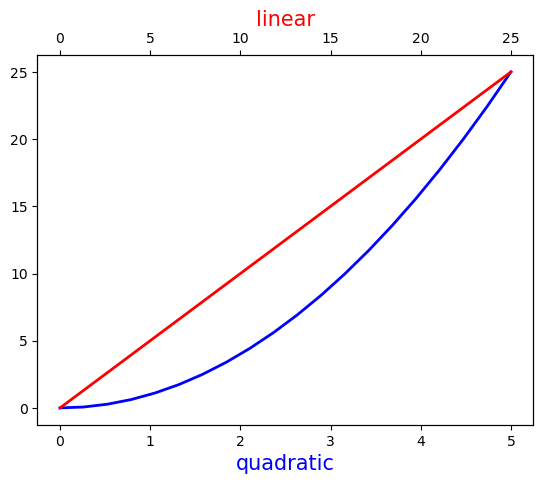

In [19]:
# example of a twiny plot
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, linewidth=2, color="blue")
ax1.set_xlabel("quadratic", fontsize=15, color="blue")
    
ax2 = ax1.twiny() # Kopie soustavy souřadnic, sdílející osu y
ax2.plot(x*5, x*5, linewidth=2, color="red")
ax2.set_xlabel("linear", fontsize=15, color="red")



# Formátování a úpravy grafů

## Rozsah grafu

Rozsahy se nastavují pro každou osu souřadnic (objekt třídy `Axes`) pomocí metod `set_xlim` a `set_ylim`.

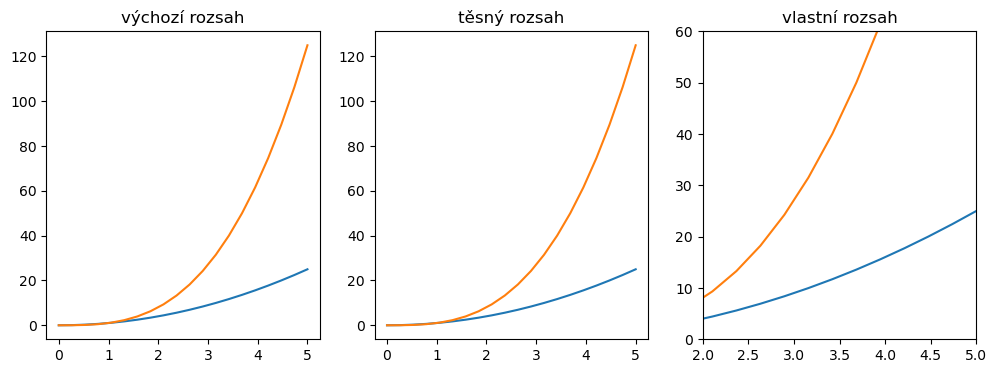

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4)) 

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("výchozí rozsah")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("těsný rozsah")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("vlastní rozsah");

# Logaritmická škála

K nastavení logaritmické škály slouží metody `set_xscale` a `set_yscale`.

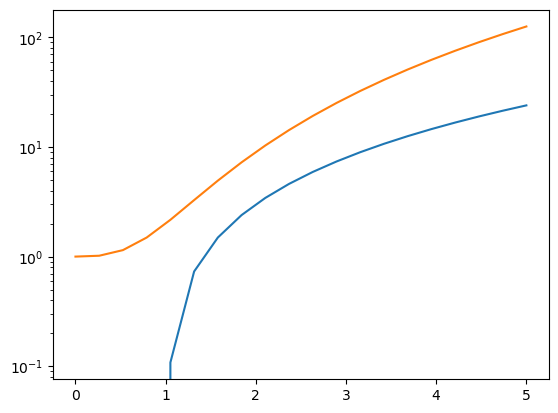

In [21]:
fig, ax = plt.subplots(1, 1) 

ax.plot(x, x**2 - 1, x, x**3 + 1)
ax.set_yscale("log")
# ax.set_xscale("log")

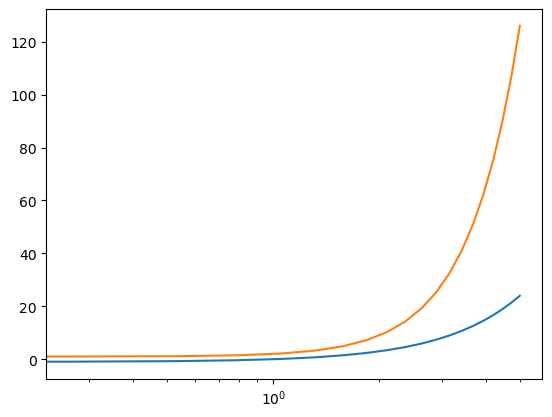

In [22]:
fig, ax = plt.subplots(1, 1)

ax.plot(x, x**2 - 1, x, x**3 + 1)
# ax.set_yscale("log")
ax.set_xscale("log")


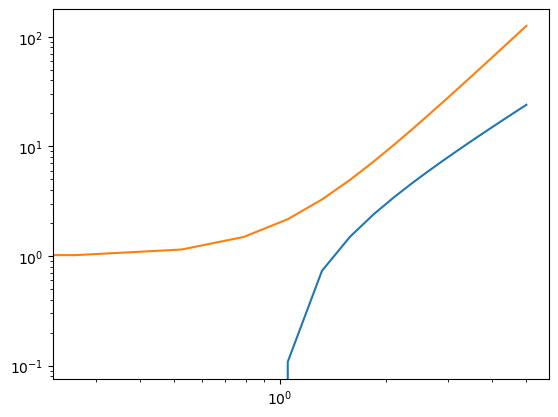

In [23]:
fig, ax = plt.subplots(1, 1)

ax.plot(x, x**2 - 1, x, x**3 + 1)
ax.set_yscale("log")
ax.set_xscale("log")


### Velikost obrázku, rozlišení

Ve chvíli, kdy vytváříme graf, můžeme mu nastavit velikost a rozlišení. Jupyter Notebook si s tím zachází lehce po svém (a ručí vlastně akorát za poměr stran), ale exportujete-li obrázky do vektorových či bitmapových formátů, můžete specifikovat přesnou velikost v palcích (`figsize`) a rozlišení v dpi neboli bodech na palec (`dpi`). Oba argumenty se při vytváření obrázku předávají funkci `figure` jako "keyword" argumenty:

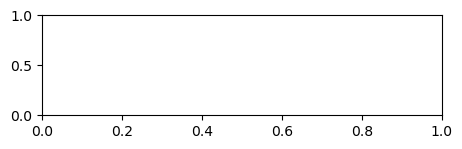

In [24]:
# Obrázek o velikost 4x1 palce s rozlišením 100 dpi
fig = plt.figure(figsize=(4, 1), dpi=100)
axes = fig.add_axes([0,0,1,1])

Argumenty lze předat i správcům rozložením, jako je např. fuknce `subplots`.

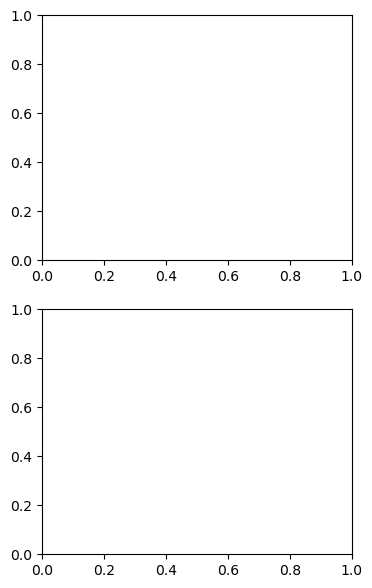

In [25]:
# Dva grafy pod sebou, které dohromady zaujímají obdélník 4x7 palců
fig, axes = plt.subplots(2, 1, figsize=(4, 7), dpi=100)

# Formátování textu

Každý textový objekt (popisek osy, legenda, titulek grafu, poznámky, ..., zkrátka instance třídy `Text`) má spoustu parametrů, které lze specifikovat. Celý výčet vlastností najdete v dokumentaci: [Zde](http://matplotlib.org/api/artist_api.html).

Pro nás budou (kromě barev) podstatné parametry `fontsize` (velikost v bodech) a `family` (název nebo druh fontu). `family` akceptuje jméno existujícího fontu nebo název kategorie:

* `serif` - patkové písmo
* `sans-serif` - bezpatkové písmo (výchozí)
* `monospace` - písmo s pevnou šířkou
* ... jsou i další, viz dokumentace [Zde](http://matplotlib.org/users/customizing.html)

Pomocí `style="italic"` můžeme nastavit kurzívu, pomocí `weight="bold"` tučné písmo (tlouštěk je hned několik, viz dokumentace).



Text(0.5, 1.0, 'serif (+ italic)')

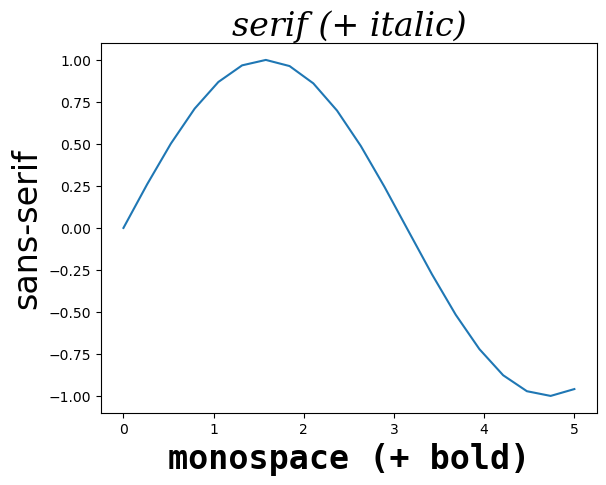

In [26]:
fig, ax = plt.subplots()

ax.plot(x, np.sin(x))
ax.set_xlabel('monospace (+ bold)', family="monospace", fontsize=24, weight="bold")
ax.set_ylabel('sans-serif', family="sans-serif", fontsize=24)
ax.set_title('serif (+ italic)', family="serif", fontsize=24, style="italic")


# Podpora $\LaTeX \text{u}$

Matplotlib nabízí výbornou podporu $\LaTeX \text{u}$. Jakýkoliv text můžeme (ostatně, totéž nabízí i Jupyter Notebook!) obklopit dvěma znaky dolaru a matplotlibu tak řekneme, že jej má interpretovat jako Latexový zdroják. Například napíšeme `"$y=x^3$"` a dostaneme $y=x^3$. To můžeme použít v `set_xlabel`, `set_ylabel`, `set_title` i kdekoliv jinde.

Pokud ale chceme vkládat příkazy LaTeXu, které začínají na zpětné lomítko `\`, musíme si dát pozor, abychom ho správně vložili. Python totiž standardně zpětné lomítko slouží pro escape sekvence. Musíme tedy buď všechna lomítka zdvojit, nebo použít tzv. raw stringy ("syrové řetězce"), které se píší s `r` před uvozovkami a escape sekvence ignorují: `r"\alpha"` nám vyprodukuje $\alpha$.

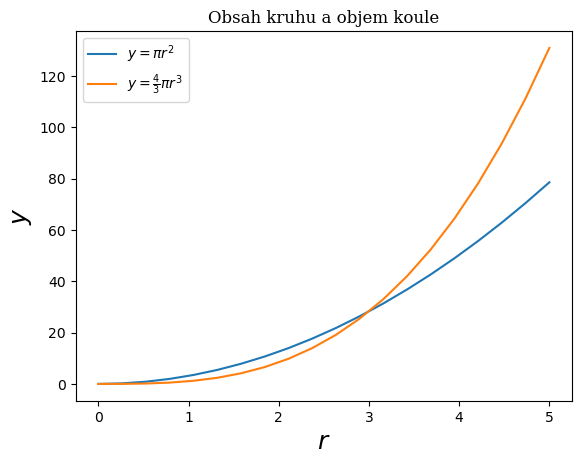

In [27]:
fig, ax = plt.subplots()

ax.plot(x, math.pi * x**2, label=r"$y = \pi r^2$")
ax.plot(x, 1.0 / 3 * math.pi * x**3, label=r"$y = \frac{4}{3}\pi r^3$")
ax.set_xlabel(r'$r$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('Obsah kruhu a objem koule', family="serif")
ax.legend(loc=2);     # Použití legendy viz dále

# Barvy a styly

## Barvy

V matplotlibu se barvy čar, textu apod. dají specifikovat dvěma způsoby (preferujeme druhý):

* pomocí jednopísmenných zkratek přímo v argumentu pro styl metody `plot` jako v MATLABu: `b` znamená modrou, `r` červenou, `g` zelenou a tak dále.

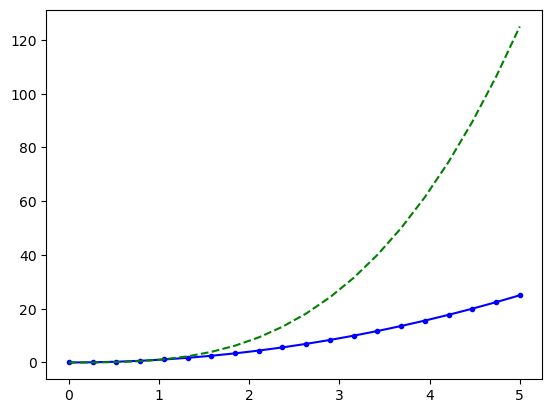

In [28]:
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-')       # Modrá čára s tečkami
ax.plot(x, x**3, 'g--');      # Zelená přerušovaná čára

* pomocí keyword argumentů `color` a (případně) `alpha`. Do prvního (`color`) můžeme zadat anglický název barvy nebo její hexadecimální vyjádření (viz třeba http://www.colorcodehex.com/html-color-picker.html), druhý nepovinný argument (`alpha`) vyjadřuje míru průhlednosti (0 = zcela průhledná, 1 = zcela neprůhledná).

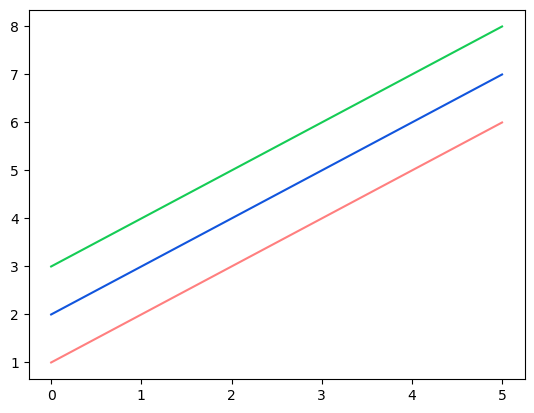

In [29]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="red", alpha=0.5) # Poloprůhledná červená
ax.plot(x, x+2, color="#1155dd")        # Jakási namodralá barva
ax.plot(x, x+3, color="#15cc55");       # Jakási nazelenalá barva 

### Styly čar a značek

Pro nastavení vlastností čáry grafu slouží keyword argumenty metody `plot`:

* `linewidth` nebo `lw` - tloušťka čáry v bodech
* `linestyle` nebo `ls`- styl čáry
* `color` - barva

Podobně nastavení značek bodů se přidává argumenty začínajícími na `marker` v téže metodě:

* `marker` - druh značky 
* `markersize` - velikost značky
* `markerfacecolor` - barva vnitřku značky
* `markeredgewidth` - tloušťka okraje
* `markeredgecolor` - barva okraje



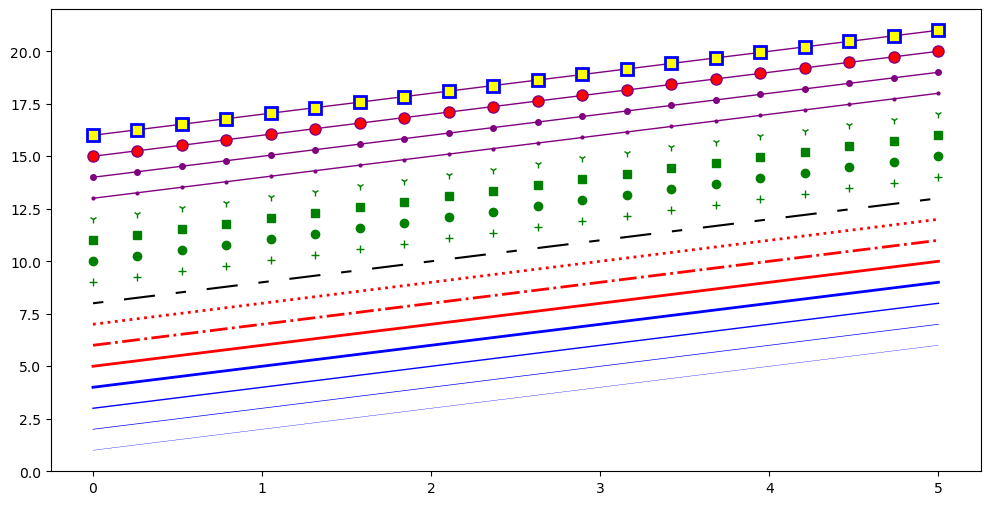

In [30]:
fig, ax = plt.subplots(figsize=(12,6))

# Tloušťka čáry
ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# Základní styly přerušované čáry ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# Vlastní styl přerušované čáry
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # formát: délka čáry, délka mezery, ...

# Výběr typu značek: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='', marker='1')

# Velikost značek a jejich barvy (vnitřní a vnější)
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

# Vzhled osy

### Umístění značek a jejich popisků

K umístění značek slouží metody `set_xticks` a `set_yticks`, jimž jako argument předáme seznam všech hodnot, kde má být značka umístěna. Pomocí `set_xticklabels` a `set_yticklabels` pak můžeme pro každou značku specifikovat vlastní popisek (pokud nám výchozí nedostačuje).

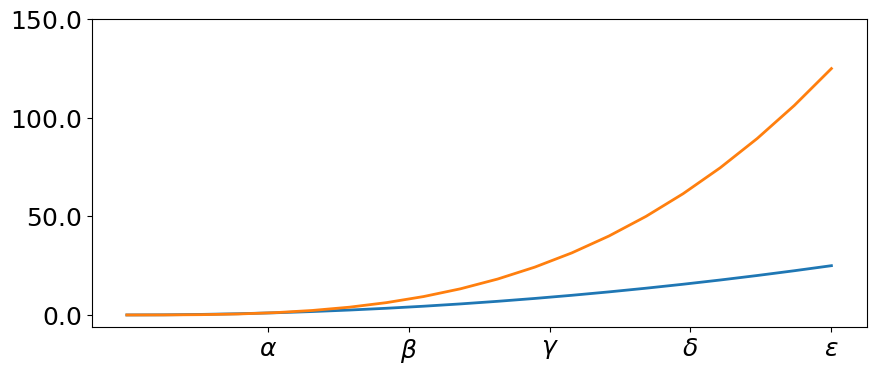

In [31]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18)     ;

Více detailů můžete nalézt zde: http://matplotlib.org/api/ticker_api.html.

# Další prvky grafu

## Legenda

Pokud chceme do grafu přidat legendu, měli bychom každé datové sadě přiřadit název pomocí keyword argumentu `label`. 
Potom ještě musíme metodou `legend` legendu pro danou souřadnicovou soustavu zobrazit.

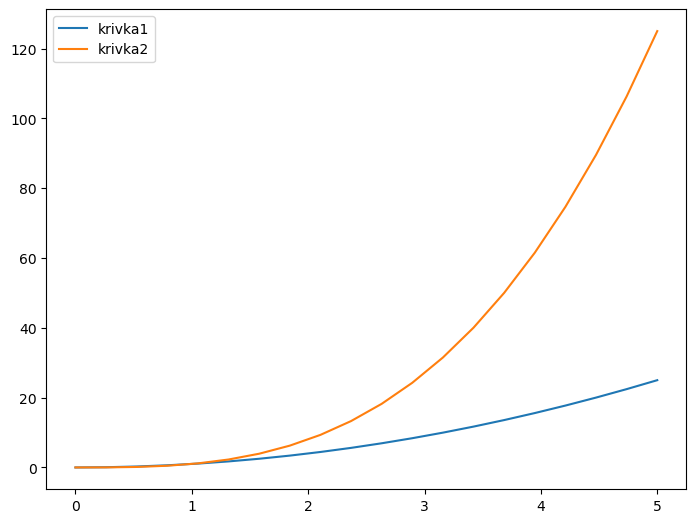

In [32]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x, x**2, label="krivka1")
ax.plot(x, x**3, label="krivka2")
ax.legend()


Lze to i najednou přímo v příkazu `legend`, je si ale třeba dát pozor na pořadí názvů.

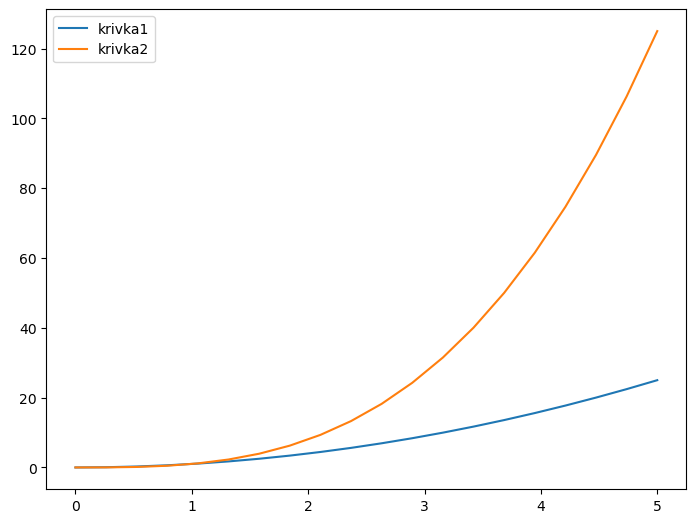

In [33]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(x, x**2)
ax.plot(x, x**3)
ax.legend(labels=('krivka1', 'krivka2'), loc='best')


Metoda `legend` přijímá keyword argument `loc`, který vyjadřuje, kam má legenda přijít. Hodnoty parametru jsou číselné a vybírají se z několika předdefinovaných hodnot. Uvádíme některé nejčastější. Více viz [dokumentace](https://matplotlib.org/2.0.2/users/legend_guide.html#legend-location)

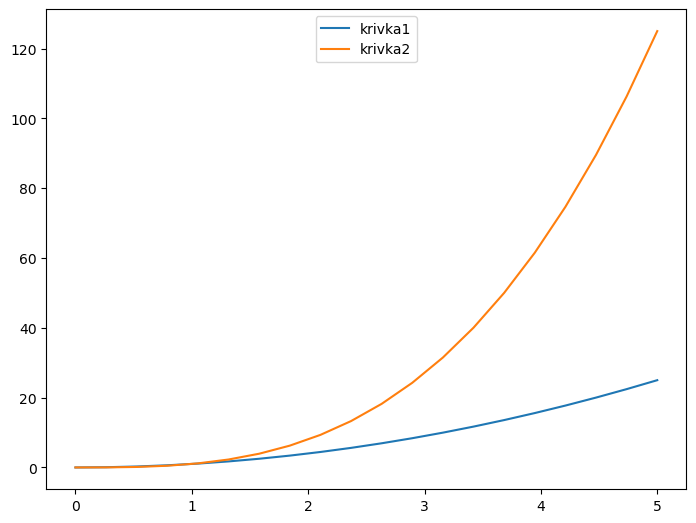

In [34]:
# Hodnoty argumentu loc
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(x, x**2, label="krivka1")
ax.plot(x, x**3, label="krivka2")

# ax.legend(loc=0) # Nechť matplotlib vybere, co považuje za nejvhodnější
# ax.legend(loc=1) # Pravý horní roh
# ax.legend(loc=2) # Levý horní roh
# ax.legend(loc=3) # Levý dolní roh
# ax.legend(loc=4) # Pravý dolní roh
# ax.legend(loc=5) # Levý okraj
# ax.legend(loc=6) # Pravý okraj
# ax.legend(loc=7) # Střed dolního okraje
# ax.legend(loc=8) # Střed horního okraje
ax.legend(loc=9) # Střední místo


## Mřížka

Zobrazení mřížky se nastavuje metodou `grid`. Její nejjednodušší varianta přijímá jeden booleovský argument a matplotlib se postará o rozumné výchozí vlasnosti. Nicméně můžeme pomocí keyword argumentů vzhled mřížky specifikovat detailněji:

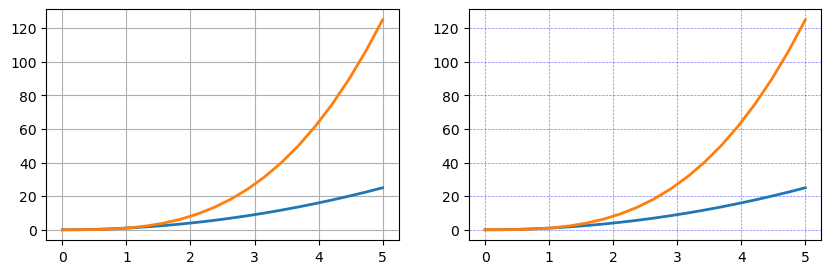

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# Nastavení výchozí mřížky
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# Nastavení výchozí mřížky s vlastnostmi
# (alpha vyjadřuje průhlednost - 0=zcela průhledná, 1=zcela neprůhledná)
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

## Libovolné textové poznámky

Pomocí metody `text` lze do grafů (třídy `Axes`) vkládat další poznámky nezávisle na osách. Pozice se udává v souřadnicích samotného grafu, nikoliv v relativních souřadnicích grafu. Opět můžeme použít $\LaTeX \text{ovou}$ syntaxi.

**Pozor na souřadnice, jsou vztaženy k velikosti axes.**

Text(1, 1, '[1,1]')

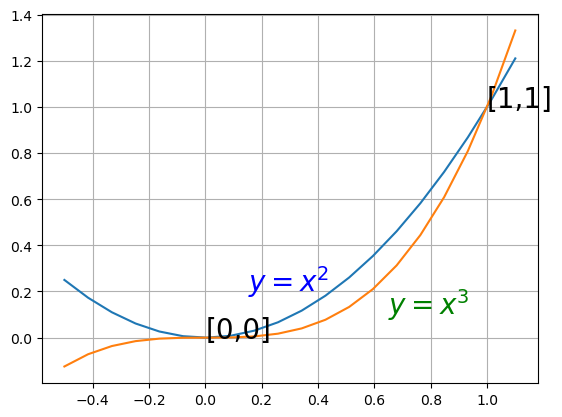

In [36]:
fig, ax = plt.subplots()

xx = np.linspace(-.5, 1.1, 20)
ax.plot(xx, xx**2, xx, xx**3)
ax.grid(True)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green")
ax.text(0, 0, r"[0,0]", fontsize=20, color="k")
ax.text(1, 1, r"[1,1]", fontsize=20, color="k")


# Další typy 2D grafů

Zatím jsme pracovali pouze s metodou `plot` a kreslili jsme čárové grafy. Kromě čárových pak existuje ještě mnoho dalších typů grafu. Jejich kompletní výčet najdete v [galerii](https://matplotlib.org/2.0.2/gallery.html). Uvádíme některé z nich pro ukázku:

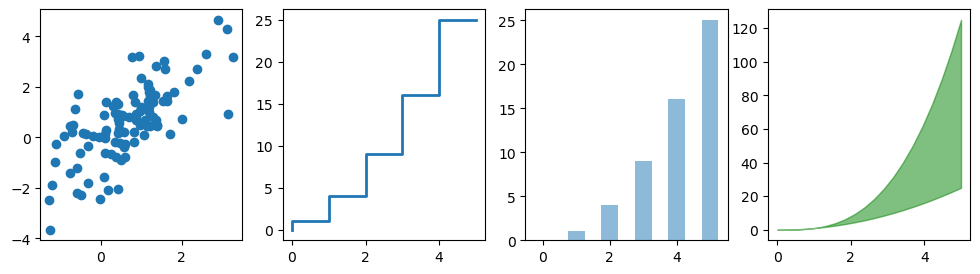

In [37]:
import numpy.random as random

n = np.array([0,1,2,3,4,5])
xx = np.linspace(0, 1, 100) + random.randn(100)

fig, axes = plt.subplots(1, 4, figsize=(12,3))

# Bodový graf
axes[0].scatter(xx, xx + random.randn(len(xx)))

# Schodový graf
axes[1].step(n, n**2, lw=2)

# Sloupcový graf
axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)

# Výplň mezi křivkami
axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5)

## Histogram

(array([1.000e+00, 0.000e+00, 5.000e+00, 1.500e+01, 4.000e+01, 1.180e+02,
        3.160e+02, 6.040e+02, 1.015e+03, 1.409e+03, 1.627e+03, 1.573e+03,
        1.404e+03, 8.840e+02, 5.880e+02, 2.320e+02, 1.220e+02, 3.400e+01,
        1.000e+01, 3.000e+00]),
 array([-4.63383285, -4.20879041, -3.78374797, -3.35870554, -2.9336631 ,
        -2.50862066, -2.08357822, -1.65853579, -1.23349335, -0.80845091,
        -0.38340847,  0.04163396,  0.4666764 ,  0.89171884,  1.31676128,
         1.74180371,  2.16684615,  2.59188859,  3.01693102,  3.44197346,
         3.8670159 ]),
 <BarContainer object of 20 artists>)

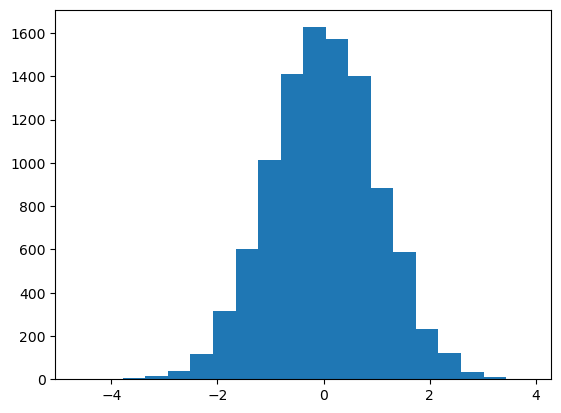

In [38]:
n = np.random.randn(10000)     # Spousta náhodných čísel (norm.rozdělení)
plt.hist(n, 20)                # Histogram o 20 "binech"

## Polární grafy

Můžeme samozřejmě vytvářet i polární grafy, stačí jen správně zadat argumenty metody `add_axes`:

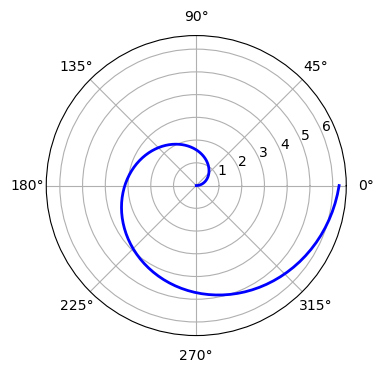

In [39]:
fig = plt.figure(figsize=(5,5))

# Polární souřadnice
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)
t = np.linspace(0, 2 * math.pi, 100)

# Jednoduchá spirála
ax.plot(t, t, color='blue', lw=2)

## Dvourozměrná vizualizace dvoudimenzionálních dat

Pokud máme vizualizovat hodnoty závislé na hodnotách dvou parametrů, $z = f(x, y)$, můžeme buď hodnoty kódovat barevně, nebo pomocí obrysového grafu. Ukážeme si obojí.

In [40]:
# Náhodně zhůvěřilá funkce
x = np.linspace(0, 6, 100)
y = np.linspace(0, 6, 100)
X, Y = np.meshgrid(x, y)
Z = ((np.sin((X + Y) ** 1.5) + 1.01) / 2) ** (np.cos(Y*3) + 1) + np.sin((X + Y) / 20)
Z = Z.T

## pcolor (barevné kódování hodnoty)
Parametr `cmap` určuje barevnou paletu, kterou se hodnoty kódují. Více barevných palet najdete v [dokumentaci](https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html).

Příkaz colorbar() vytvoří legendu pro barvu.

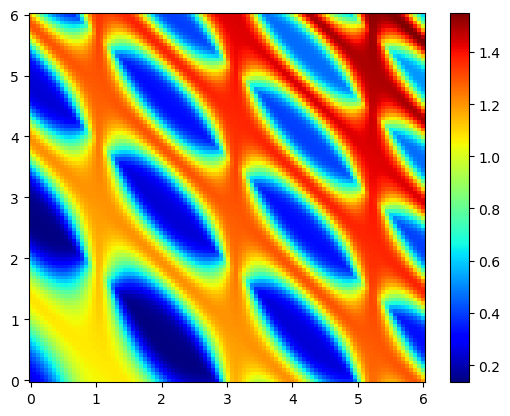

In [41]:
fig, ax = plt.subplots()

p = ax.pcolor(X, Y, Z, shading='auto', cmap="jet", vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

## imshow (obrazová data)

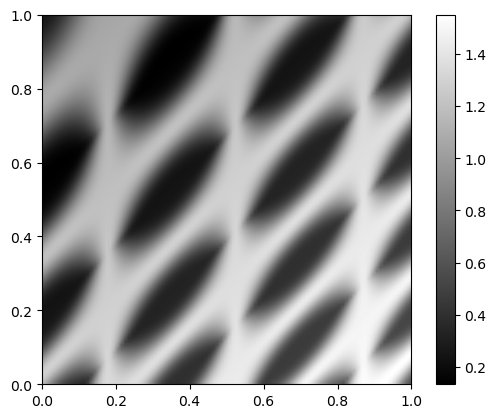

In [42]:
fig, ax = plt.subplots()

im = plt.imshow(Z, cmap="gray", vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

# Výběr interpolace = vyhlazování
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

## contour (obrysový graf)
Podrobnosti viz [dokumentace](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html).

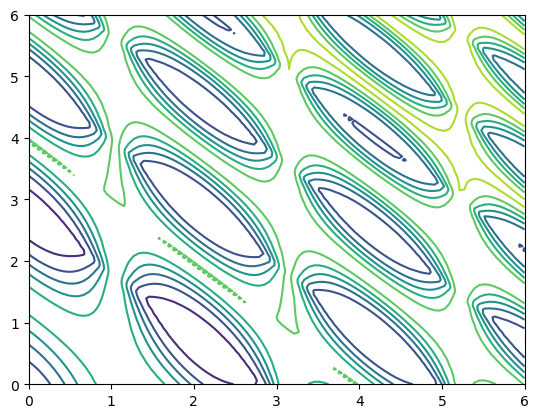

In [43]:
fig, ax = plt.subplots()
cnt = plt.contour(X, Y, Z)

# 3D grafy

Pro kreslení trojrozměrných grafů musíme nejdřív vytvořit trojrozměrnou soustavu souřadnic jako instanci třídy `Axes3D`. 3D grafy můžeme do obrázku vkládat stejně jako dvourozměrné, nejjednodušší je ale použít keyword argument `projection='3d'` u klasických metod `add_axes` a `add_subplot`.

In [44]:
from mpl_toolkits.mplot3d import Axes3D

## Povrchové grafy

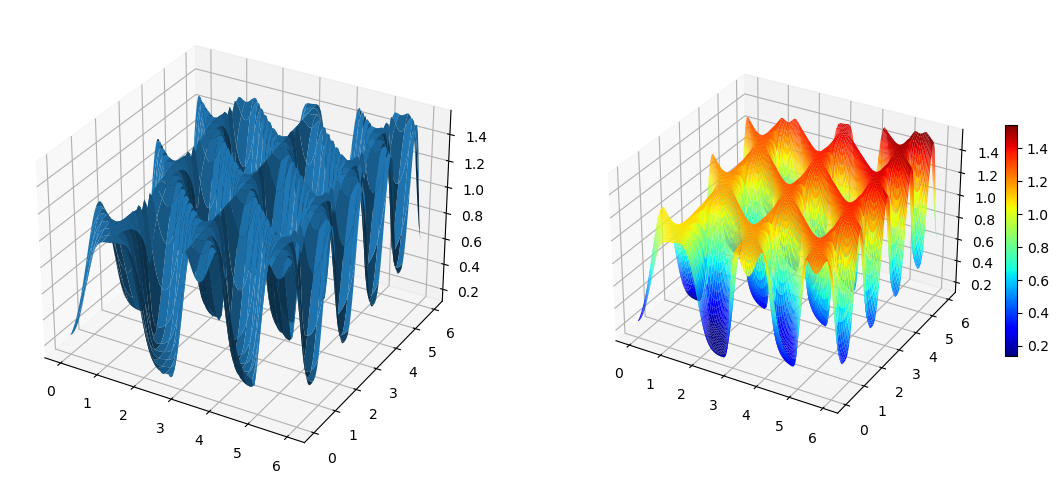

In [45]:
fig = plt.figure(figsize=(14,6))

# `ax` je trojrozměrná osa (díky keyword argumentu projection)
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# Povrchový graf s doprovodnou barevnou informací
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap="jet", linewidth=0, antialiased=True)
cb = fig.colorbar(p, shrink=0.5)

## Drátěný (wire-frame) graf

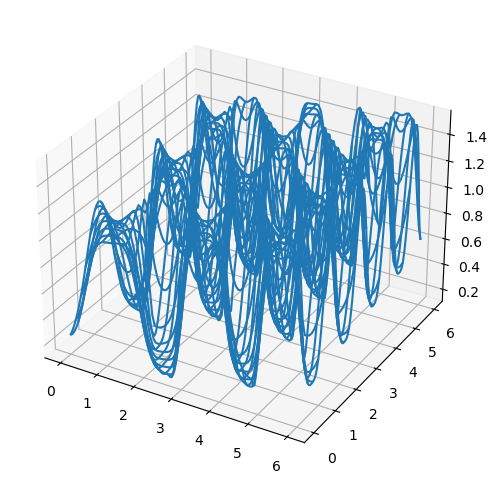

In [46]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

Více informací o trojrozměrných grafech najdete zde: [dokumentace](https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html).

# Backendy

Matplotlib nabízí spoustu tzv. "backendů", které se starají o vytváření grafů v různých formátech (SVG, PNG, PDF, ...) a jejich zobrazování pomocí různých technologií (Qt, GTK, přímo v Jupyter Notebooku atp.). Některé jsou interaktivní, jiné ne, nebudeme si je ale ukazovat jeden po druhém.

Seznam všech podporovaných backendů v aktuální instalaci matplotlibu:

In [47]:
import matplotlib
print(matplotlib.rcsetup.all_backends)

['GTK3Agg', 'GTK3Cairo', 'GTK4Agg', 'GTK4Cairo', 'MacOSX', 'nbAgg', 'QtAgg', 'QtCairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']


Ne vždy se hodí inline backend. Především pokud chceme s grafem interaktivně pracovat (zoom, posun apod.) použijeme např. Qt5 backend pomocí
```
%matplotlib qt5
```

In [48]:
%matplotlib qt5


In [49]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x), '-')

In [50]:
from mpl_toolkits.mplot3d import Axes3D

X, Y = np.meshgrid(np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25))
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot')


## Odkazy

* http://www.matplotlib.org - Hlavní stránka projektu
* http://matplotlib.org/gallery.html - Galerie se spoustou příkladů toho, co se v matplotlib dá udělat.
* http://www.loria.fr/~rougier/teaching/matplotlib - Dobrý tutoriál (v angličtině).

## Jak vylepšit (nebo také ne) vzhled grafů z Matplotlib

* https://matplotlib.org/tutorials/introductory/customizing.html
* https://github.com/mwaskom/seaborn

## Další knihovny pro práci s grafy

* **Plotly** - JavaScript knihovna s Python API a také online prostředím pro kreslení grafů: https://plot.ly/
* **Bokeh** - interaktivní grafy pomocí HTML + JS od Continuum Analytics, http://bokeh.pydata.org/
* **Holoviews** - vizualizace dat propojená s práci s daty samotnými.
* a další, přehled najdete na https://pyviz.org/